In [1]:
#Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import math
from sklearn.model_selection import ParameterGrid
%matplotlib inline

from userSimilarityModels_v1 import *

In [2]:
#Initializing the objects for classes:
prepData = prepareData()
cm = correlationMethods()
binaryRec = binaryRecommenders()
binaryRecHighCorr = binaryRecommenders_high_correlation()
playPred = playtimePredictionMethods()
model = Model()
evalPerf = evaluatePerformace()

In [3]:
# Loading and preparing data:
# We convert the playtime of every user-game pair using their game-wise CDF value
data = prepData.makeData('final_data.csv')
data.drop(['playtime_forever', 'playtime_forever_scaled'], inplace = True, axis = 1)
data.head()

,steamid,appid,playtime_cdf
0,76561197960275345,10,0.100518
1,76561197960470481,10,0.100518
2,76561197961147005,10,0.100518
3,76561197961468715,10,0.100518
4,76561197961478640,10,0.100518


In [5]:
print('Sparsity of the dataset is {}%'.format(prepData.sparsity(data)))

Sparsity is 98.16%


In [4]:
# Splitting the data into train and test:
train, test = prepData.train_test_split(data, 0.8)

In [5]:
# Obtaining the Matrix form for the Binary and Continuous Models:
trainBinaryMatrix = prepData.getBinaryMatrix(train)
trainMatrix = prepData.getMatrix(train, col_name= 'playtime_cdf')

In [6]:
trainBinaryMatrix.head()

appid,10,20,30,40,50,60,70,80,100,130,...,935270,939400,939760,943380,947600,952440,955560,957790,963690,973760
steamid,,,,,,,,,,,,,,,,,,,,,
76561197960270862,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960275345,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960290105,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960316968,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561197960321194,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
trainMatrix.head()

appid,10,20,30,40,50,60,70,80,100,130,...,935270,939400,939760,943380,947600,952440,955560,957790,963690,973760
steamid,,,,,,,,,,,,,,,,,,,,,
76561197960270862,NaN,NaN,0.387604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197960275345,0.100518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197960290105,0.119314,NaN,0.468085,NaN,0.257669,0.359002,0.288288,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197960316968,NaN,NaN,NaN,NaN,NaN,NaN,0.632363,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76561197960321194,0.136203,0.202166,0.996300,NaN,0.203988,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Binary Models

#### Pearson Correlation Based Model

##### Average performance based on 10 runs data

In [3]:
model.runModel(data, method = 'binary', col_name = 'playtime_cdf', corr_method = 'pearson', nruns = 10, train_ratio = 0.8, k = 10, p_out = True)

/scratch/bva212/steam_data/userSimilarityModels.py:160: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  corr_den = np.sqrt(np.matmul(np.sum(pow(dataset_submean, 2), axis = 1).reshape((n,1)), np.sum(pow(dataset_submean, 2), axis = 1).reshape((1,n)))) + self.eps


After 1 iteration: 185.83770108222961 seconds elapsed
--- Total 185.83789563179016 seconds elapsed ---


([0.18950054871274727], [0.40938967136150234])

#### Cosine Similarity Based Model

##### Average performance based on 10 runs data

In [17]:
model.runModel(data, method = 'binary', col_name = 'playtime_cdf', corr_method = 'cosine', nruns = 10, train_ratio = 0.8, k = 10, p_out = True)

After 1 iteration: 208.87154173851013 seconds elapsed
--- Total 208.87178254127502 seconds elapsed ---


([0.18765414516838747], [0.4027085590465872])

#### Variation of Model Performance based on #items being recommended:

##### Parameters evaluated:
Model Type = Binary

Correlation Method = Pearson Correlation

Items Recommended = [5, 10, 20, 50]

/scratch/bva212/steam_data/userSimilarityModels.py:158: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  corr_den = np.sqrt(np.matmul(np.sum(pow(dataset_submean, 2), axis = 1).reshape((n,1)), np.sum(pow(dataset_submean, 2), axis = 1).reshape((1,n)))) + self.eps


--- Total 298.2943117618561 seconds elapsed ---
--- Total 449.44926929473877 seconds elapsed ---
--- Total 298.32067823410034 seconds elapsed ---
--- Total 289.12276005744934 seconds elapsed ---


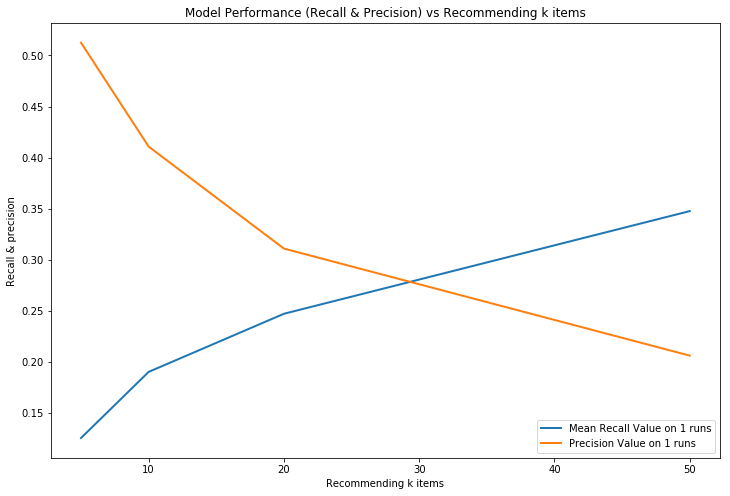

In [5]:
evalPerf.plotRec_k_GamesPerformance(data, p_out = True)

It makes sense to note that Recall, which indicates the proportion of relevant items being recommended, increases as we increase the number of recommendations and precision, which is proportion of relevant items in recommended items, is decreasing with increase in number of items being recommended.

### Continuous Ratings Prediction Model:

#### Cosine Similarity Based Model:

In [30]:
predict_playtime_Cosine_performance = []
predict_playtime_Cosine_performance.append(model.runModel(data, corr_method= 'cosine', col_name = 'playtime_cdf', nruns= 10, train_ratio= 0.8, method= 'predict_playtime', p_out = True))

/scratch/bva212/steam_data/userSimilarityModels.py:637: RuntimeWarning: invalid value encountered in true_divide
  predicted_scores = total_scores/total_sums


After 1 iteration: 117.05427670478821 seconds elapsed
After 6 iteration: 704.1049144268036 seconds elapsed
--- Total 1174.875526189804 seconds elapsed ---


In [32]:
predict_playtime_Cosine_performance = pd.DataFrame(predict_playtime_Cosine_performance)
predict_playtime_Cosine_performance.to_csv('CosinePerformance_on_10_runs.csv')
predict_playtime_Cosine_performance

,0,1,2,3,4,5,6,7,8,9
0,0.266313,0.266012,0.265828,0.265999,0.26577,0.266335,0.266503,0.266493,0.266522,0.266076


#### Mean Performance of the Cosine Similarity based Continuous Ratings Model

In [75]:
np.mean(predict_playtime_Cosine_performance, axis = 1)

0    0.266185
dtype: float64

### Fine Grid Search on Binary Classification Based Models

In [67]:
## Binary Classification Based Models:
methods = ['binary']
corr_methods = ['pearson', 'constrained_pearson', 'cosine', 'adjusted_cosine']
nrun = [5]
train_ratio_value = [0.8]
k_values_list = [5, 10, 20, 50]

param_grid = {'method' : methods,
              'corr_method' : corr_methods,
              'nruns' : nrun,
              'train_ratio' : train_ratio_value,
              'k' : k_values_list
              }

parameters_grid = ParameterGrid(param_grid)

binary_performance = []

for params in parameters_grid:
    binary_performance.append([params, [model.runModel(data, col_name = 'playtime_cdf', p_out = True, **params)]])
        
df_binary_perf = pd.DataFrame(binary_performance)
df_binary_perf.to_csv('BinaryModelsPerformanceCollection_v1.csv')

/scratch/bva212/steam_data/userSimilarityModels.py:160: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  corr_den = np.sqrt(np.matmul(np.sum(pow(dataset_submean, 2), axis = 1).reshape((n,1)), np.sum(pow(dataset_submean, 2), axis = 1).reshape((1,n)))) + self.eps


After 1 iteration: 239.36769461631775 seconds elapsed
--- Total 1204.897750377655 seconds elapsed ---
After 1 iteration: 241.0010244846344 seconds elapsed
--- Total 1208.2033801078796 seconds elapsed ---
After 1 iteration: 241.9720721244812 seconds elapsed
--- Total 1394.2327942848206 seconds elapsed ---
After 1 iteration: 377.1801407337189 seconds elapsed


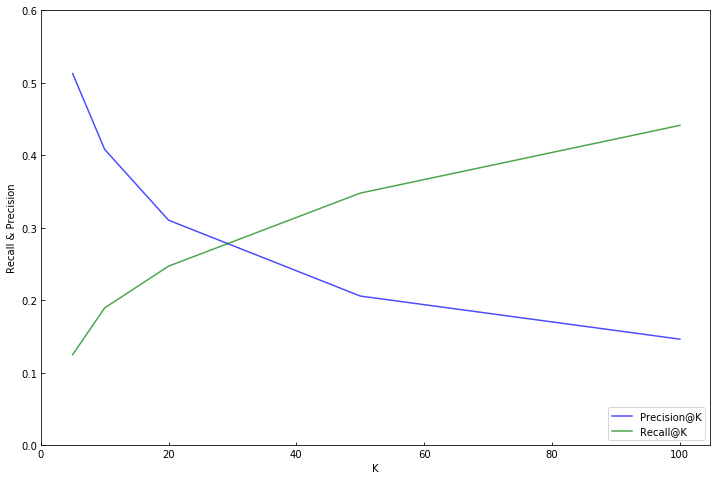

In [69]:
## Pearson Correlation performance variance w.r.t 'k' values
bm_dump = pd.read_csv('/steam_data/BinaryModelsPerformanceCollection.csv', index_col = 0)

bm_dump = pd.concat([bm_dump.drop(['0'], axis=1), bm_dump['0'].apply(eval).apply(pd.Series)], axis=1)

bm_dump = pd.concat([bm_dump.drop(['1'], axis=1), bm_dump["1"].apply(eval).apply(pd.Series)], axis=1)

bm_dump = pd.concat([bm_dump.drop([0], axis=1), bm_dump[0].apply(pd.Series)], axis=1)
bm_dump.rename(str, columns = {0:'recall', 1:'precision'}, inplace= True)

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(bm_dump[bm_dump['corr_method'] == 'pearson']['k'], [np.mean(i) for i in np.array(bm_dump[bm_dump['corr_method'] == 'pearson']['precision'])], alpha = 0.7, color = "blue", label = "Precision@K")
ax.plot(bm_dump[bm_dump['corr_method'] == 'pearson']['k'], [np.mean(i) for i in np.array(bm_dump[bm_dump['corr_method'] == 'pearson']['recall'])], alpha = 0.7, color = "g", label = "Recall@K")
ax.set_xlabel("K")
ax.set_ylabel("Recall & Precision")
ax.tick_params(direction = "in")

ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax.legend(loc='lower right')
fig.savefig("plots/pearson_kValues.svg")
plt.show()

### Fine Grid Search on Correlation Threshold to tune performance:

In [84]:
## Binary Classification with High Correlation Based Models:
methods = ['binary_highcorrelation']
corr_methods = ['pearson', 'cosine']
nrun = [1]
train_ratio_value = [0.8]
k_values_list = [5, 10, 20, 50]
corr_threshold_values = [0, 0.1, 0.25, 0.4, 0.5]

param_grid = {'method' : methods,
              'corr_method' : corr_methods,
              'nruns' : nrun,
              'train_ratio' : train_ratio_value,
              'k' : k_values_list,
              'corr_threshold' : corr_threshold_values
              }

parameters_grid = ParameterGrid(param_grid)

binary_highcorrelation_performance = []

for params in parameters_grid:
    binary_highcorrelation_performance.append([params, [model.runModel(data, col_name = 'playtime_cdf', p_out = True, **params)]])

df_binary_perf = pd.DataFrame(binary_highcorrelation_performance)
df_binary_perf.to_csv('BinaryModelsHighCorrPerformanceCollection.csv')

/scratch/bva212/steam_data/userSimilarityModels_v1.py:160: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  corr_den = np.sqrt(np.matmul(np.sum(pow(dataset_submean, 2), axis = 1).reshape((n,1)), np.sum(pow(dataset_submean, 2), axis = 1).reshape((1,n)))) + self.eps


After 1 iteration: 232.88421630859375 seconds elapsed
--- Total 232.884432554245 seconds elapsed ---
After 1 iteration: 233.188960313797 seconds elapsed
--- Total 233.18917536735535 seconds elapsed ---
After 1 iteration: 233.68665051460266 seconds elapsed
--- Total 233.68687534332275 seconds elapsed ---
After 1 iteration: 232.49224257469177 seconds elapsed
--- Total 232.49248337745667 seconds elapsed ---
After 1 iteration: 239.28418397903442 seconds elapsed
--- Total 239.28440141677856 seconds elapsed ---
After 1 iteration: 239.42987608909607 seconds elapsed
--- Total 239.43011355400085 seconds elapsed ---
After 1 iteration: 239.06998538970947 seconds elapsed
--- Total 239.0704984664917 seconds elapsed ---
After 1 iteration: 239.75225949287415 seconds elapsed
--- Total 239.75276947021484 seconds elapsed ---
After 1 iteration: 225.34570741653442 seconds elapsed
--- Total 225.3462119102478 seconds elapsed ---
After 1 iteration: 218.31188464164734 seconds elapsed
--- Total 218.31212282180

In [86]:
bhp_dump = pd.read_csv('BinaryModelsHighCorrPerformanceCollection.csv', index_col=0)

bhp_dump = pd.concat([bhp_dump.drop(['0'], axis=1), bhp_dump['0'].apply(eval).apply(pd.Series)], axis=1)#bm_dump["0"].apply(eval).apply(pd.Series)
bhp_dump.head()

bhp_dump = pd.concat([bhp_dump.drop(['1'], axis=1), bhp_dump["1"].apply(eval).apply(pd.Series)], axis=1)#bm_dump["0"].apply(eval).apply(pd.Series)
bhp_dump.head()

bhp_dump = pd.concat([bhp_dump.drop([0], axis=1), bhp_dump[0].apply(pd.Series)], axis=1)#bm_dump["0"].apply(eval).apply(pd.Series)
bhp_dump.rename(str, columns = {0:'recall', 1:'precision'}, inplace= True)
bhp_dump.head()

,corr_method,corr_threshold,k,method,nruns,train_ratio,recall,precision
0,pearson,0.0,5,binary_highcorrelation,1,0.8,[0.12459710471758163],[0.5107258938244854]
1,pearson,0.0,10,binary_highcorrelation,1,0.8,[0.18841419037064694],[0.40741061755146263]
2,pearson,0.0,20,binary_highcorrelation,1,0.8,[0.251999816944973],[0.30309136872517156]
3,pearson,0.0,50,binary_highcorrelation,1,0.8,[0.35596353782104884],[0.1996865294330083]
4,pearson,0.1,5,binary_highcorrelation,1,0.8,[0.1291434933463392],[0.5359913326110509]


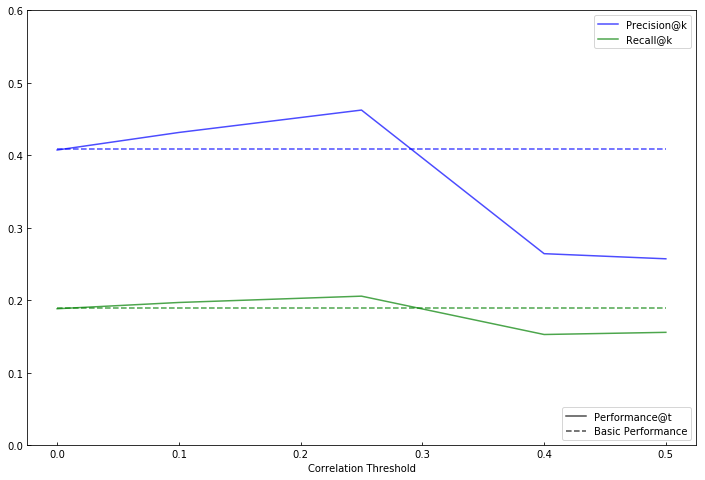

In [89]:
fig, ax = plt.subplots(figsize = (12, 8))
linp, = ax.plot(bhp_dump[(bhp_dump['corr_method'] == 'cosine') & (bhp_dump['k'] == 10)]['corr_threshold'], [np.mean(i) for i in np.array(bhp_dump[(bhp_dump['corr_method'] == 'pearson') & (bhp_dump['k'] == 10)]['precision'])], alpha = 0.7, color = "blue")
logp, = ax.plot(bhp_dump[(bhp_dump['corr_method'] == 'cosine') & (bhp_dump['k'] == 10)]['corr_threshold'], [0.40834525099313829 for i in np.array(bhp_dump[(bhp_dump['corr_method'] == 'pearson') & (bhp_dump['k'] == 10)]['precision'])], '--', alpha = 0.7, color = "blue")

linr, = ax.plot(bhp_dump[(bhp_dump['corr_method'] == 'cosine') & (bhp_dump['k'] == 10)]['corr_threshold'], [np.mean(i) for i in np.array(bhp_dump[(bhp_dump['corr_method'] == 'pearson') & (bhp_dump['k'] == 10)]['recall'])], alpha = 0.7, color = "g")
logr, = ax.plot(bhp_dump[(bhp_dump['corr_method'] == 'cosine') & (bhp_dump['k'] == 10)]['corr_threshold'], [0.18945162839030899 for i in np.array(bhp_dump[(bhp_dump['corr_method'] == 'pearson') & (bhp_dump['k'] == 10)]['precision'])], '--', alpha = 0.7, color = "g")

dum1, = ax.plot([], [], c = "k", alpha = 0.7)
dum2, = ax.plot([], [], c = "k", alpha = 0.7, ls = "--")

legend1 = plt.legend([linp, linr], ["Precision@k", "Recall@k"], loc = "upper right")
legend2 = plt.legend([dum1, dum2], ["Performance@t", "Basic Performance"], loc = "lower right")
ax.add_artist(legend1)
ax.set_xlabel("Correlation Threshold")
ax.tick_params(direction = "in")
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
#ax.set_yticks(np.arange(0.1, 1, 0.1))
fig.savefig("plots/CF_Corr_threshold.svg")
plt.show()